## Notebook feito por [**Alberto E. Mendes**](https://https://github.com/albertomendess)

## <font color=gree> Introdução

No momento em que você estiver lendo este caderno, terabytes de dados estão sendo gerados coletivamente em todo o mundo - mais dados do que qualquer um poderia imaginar, muito menos como algum de nós sequer poderia processar, ou até mesmo criar um sentido para tudo o que cosumimos de dados.

Como resposta ao grande fluxo de dados que geramos na última década, o campo da Ciência de Dados ganhou destaque com base na importancia que se tem desde obtenção dos dados até a criação de insights. Em outras palavras, o campo da Ciência de dados representa nosso desejo coletivo de entender e aproveitar a abundância de dados ao nosso redor para construir um mundo melhor.

Neste caderno, meu objetivo será examinar um pipeline básico a respeito de análise de dados Python e estatística com idéias simples.

**Este notebook é um trabalho público. Assim dito, caso encontre alguma imprecisão gritante ou se um tópico crítico estiver faltando, sinta-se à vontade para apontá-lo ou (de preferência) enviar uma solicitação de pull para melhorar o notebook.**

## <font color=gree> Bibliotecas necessárias

Esse notebook é trabalhado em cima de pacotes Python já que é a linguagem padrão do Anaconda Python.
As bibliotecas que usaremos são:



*   **NumPy**: Fornece uma estrutura de matriz numérica rápida e com funções auxiliares.
*   **Pandas**: Fornece uma estrutura DataFrame para armazenar dados na memória e trabalhar com eles de forma fácil e eficiente.
*   **Matplotlib**: Biblioteca básica de plotagem. Usada para visualizações rápidas mas que outras bibliotecas são contruídas em cima dela.
*   **Seaborn**: Biblioteca avançada de plotagem estatística.



In [ ]:
import numpy as np
import seaborn as sns

## <font color=gree>Dominando o problema

Para propósitos deste projeto, vamos fingir que estamos trabalhando para uma empresa que está interessada no público que fez o vestibular do Enem de 2021. Estamos trabalhando com uma equipe de Cientistas de Dados e construiremos parte do pipeline de análise de dados para essa empresa.

Fomos encarregados pelo chefe de ciência de dados da nossa empresa de juntar o máximo de informações possíveis a respeito do Exame Nacional do Ensino Médio (ENEM) do ano de 2021. 

Essas informações podem ser:
* média, moda e mediana;
* soma de variáveis quantitativas;
* cruzamento de variáveis sejam elas qualitativas ou quantitativas;
* distribuições de frequência;
* visualização na forma de dataframe (quadro de dados) ou de forma gráfica.


## <font color=gree>Fonte dos dados

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

## <font color=gree> Relatório de análise Microdados ENEM 2021


O **Exame Nacional do Ensino Médio** (**Enem**), tem como objetivo, avaliar o desempenho dos estudantes ao término da educação básica.
Os participantes respondem à uma prova de 180 questões ao todo divididas em: **Linguagens, códigos e suas tecnologias**; **Ciências humanas e suas tecnologias**; **Ciências da natureza e suas tecnologias**; e **Matemática e suas tecnologias**. 
Os participantes são avaliados também por meio de uma **redação**, que exige o desenvolvimento de um texto dissertativo-argumentativo a partir de uma situação-problema.

## <font color=gree> Passo 1: Resolvendo a pergunta

O primeiro passo para qualquer projeto de análise de dados é definir a questão ou o problema que estamos procurando resolver e definir uma medida (ou conjunto de medidas) para nosso sucesso na resolução dessa tarefa. Podemos criar uma lista de verificação de análise de dados onde trabalharesmos em cima de algumas perguntas.

> Você especificou o tipo de pergunta analítica de dados (exploração, causalidade de associação, etc) antes de tocar nos dados?

Estamos construindo um quadro geral de análise de dados para saber se existe correlações entre variáveis qualitativas e quantitativas. Futuramente, essa análise poderá ser usada para criar um sistema melhor de provas ou até mesmo entregar uma resposta para uma melhor forma de ensino.

> Pode se fazer análises preditivas com o conjunto de dados disponíveis hoje?

Uma predição bem sucedida em cima de dados depende do quanto de informações úteis poderá nos fornecer. Os dados nem sempre são válidos na primeira vez que encontramos. Vejamos alguns fatores que causam essa invalidade:

* dados incompletos: Faltando alguns atributos ou valores;
* dados ruidosos: Contendo valores atípicos ou erros.

Usaremos uma base de dados fornecidos pelo Inep e a partir dela poderemos fazer o tratamento de dados incompletos e ruidosos afim de deixar de forma organizada as informações para futuras análises preditivas.

> Você considerou se a pergunta poderia ser respondida com os dados disponíveis?

O conjunto de dados que temos atualmente pode ter variáveis que não tinham em dados anteriores e poderão contribuir para novas variáveis futuras; criando um quadro geral estruturado.

***

Perceba que passamos um bom tempo trabalhando no problema sem escrever uma linha de código sequer ou mesmo examinar os dados.

**Documentar um problema que estamos trabalhando é um passo importante para realizar uma análise de dados eficaz que muitas vezes passa despercebida.**

## <font color=gree>Passo 2: Verificando os dados

O proximo passo é examinar os dados com os quais estamos trabalhando. Mesmo cunjuntos de dados selecionados do governo podem conter dados incompletos e ruidosos. É de total impotancia detectar essas incompatibilidades antes de investir nosso tempo com nossas análises.

Geralmente, procuramos responder as seguintes perguntas:

* Existe algo de errado com os dados?
* Existe alguma peculiaridade nos dados?
* O que posso corrigir ou remover nos dados?

Feito essas perguntas podemos começar lendo os dados em um DataFrame pandas.

In [ ]:
import pandas as pd

In [ ]:
url = '/content/drive/MyDrive/DADOS/MICRODADOS_ENEM_2021.csv'

In [ ]:
df_enem = pd.read_csv(url, encoding='latin-1', sep=';')
df_enem.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,...,A,A,A,A,A,A,B,A,A,B
6,210052615524,2021,9,F,0,3,1,1,6,1,...,B,A,A,B,B,A,C,A,A,B
7,210054368957,2021,4,F,1,1,1,1,1,1,...,B,A,A,C,B,A,D,B,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,...,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,...,B,A,B,C,B,A,C,A,A,B


Os dados parecem estar em um formato utilizavel.

A primeira linha de dados define os cabeçalhos das colunas. Podemos ver que existem dados variádos em cada coluna (qualitativas e quantitativas).

Muitas colunas não parecem ser descritivas o suficiente. Criaremos então uma descrição para revisarmos o que cada coluna representa. Aproveitaremos para selecionar algumas colunas que nos interessa em primeiras análises.

## <font color=gree> Variáveis utilizadas

> #### TP_FAIXA_ETARIA
> ***
Faixa etária

|Código|Descrição|
|---|---|
|1|Menor de 17 anos|
|2|17 anos|
|3|18 anos|
|4|19 anos|
|5|20 anos|
|6|21 anos|
|7|22 anos|
|8|23 anos|
|9|24 anos|
|10|25 anos|
|11|Entre 26 e 30 anos|
|12|Entre 31 e 35 anos|
|13|Entre 36 e 40 anos|
|14|Entre 41 e 45 anos|
|15|Entre 46 e 50 anos|
|16|Entre 51 e 55 anos|
|17|Entre 56 e 60 anos|
|18|Entre 61 e 65 anos|
|19|Entre 66 e 70 anos|
|20|Maior de 70 anos|


> #### TP_SEXO
> ***
Sexo

|Código|Descrição|
|---|---|
|M|Masculino|
|F|Feminino|


> #### TP_ESTADO_CIVIL
> ***
Estado civil

|Código|Descrição|
|---|---|
|0|Não informado|
|1|Solteiro(a)|
|2|Casado(a)/Mora com companheiro(a)|
|3|Divorciado(a)/Desquitado(a)/Separado(a)|
|4|Viúvo(a)|

             
> #### TP_COR_RACA
> ***
Cor/Raça

|Código|Descrição|
|---|---|
|0|Não declarado|
|1|Branca|
|2|Preta|
|3|Parda|
|4|Amarela|
|5|Indígena|
|6|Não dispõe da informação|


> #### TP_ESCOLA
> ***
Tipo de escola do Ensino Médio

|Código|Descrição|
|---|---|
|1|Não respondeu|
|2|Pública|
|3|Privada|


> #### TP_ENSINO
> ***
Tipo de instituição que concluiu ou concluirá o Ensino Médio

|Código|Descrição|
|---|---|
|1|Ensino Regular|
|2|Educação Especial - Modalidade Substutiva|


> #### NU_NOTA_CN
> ***
Nota da prova de Ciências da Natureza

> #### NU_NOTA_CH
> ***
Nota da prova de Ciências Humanas

> #### NU_NOTA_LC
> ***
Nota da prova de Linguagens e Códigos

> #### NU_NOTA_MT
> ***
Nota da prova de Matemática

> #### NU_NOTA_COMP1
> ***
Nota da Competência 1 - Demonstrar da modalidade escrita formal

> #### NU_NOTA_COMP2
> ***
Nota da Competência 2 - Compreender a proposta de redação e aplicar

> #### NU_NOTA_COMP3
> ***
Nota da Competência 3 - Selecionar, relacionar, organizar e interpretar

> #### NU_NOTA_COMP4
> ***
Nota da Competência 4 - Demonstrar conhecimento dos mecanismos

> #### NU_NOTA_COMP5
> ***
Nota da Competência 5 - Elaborar proposta de intervenção para o problema

> #### NU_NOTA_REDACAO
> ***
Nota da prova de redação


## <font color=gree>Criando um novo Dataframe com variáveis selecionadas

In [ ]:
df_enem = pd.DataFrame(df_enem[[
                         'TP_FAIXA_ETARIA',
                         'TP_SEXO',
                         'TP_ESTADO_CIVIL',
                         'TP_COR_RACA',
                         'TP_ESCOLA',
                         'TP_ENSINO',
                         'NU_NOTA_CN',
                         'NU_NOTA_CH',
                         'NU_NOTA_LC',
                         'NU_NOTA_MT',
                         'NU_NOTA_COMP1',
                         'NU_NOTA_COMP2',
                         'NU_NOTA_COMP3',
                         'NU_NOTA_COMP4',
                         'NU_NOTA_COMP5',
                         'NU_NOTA_REDACAO',
]])

df_enem.head(10)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,5,F,1,1,1,NaN,NaN,574.6,472.6,NaN,140.0,120.0,120.0,180.0,200.0,760.0
1,12,M,1,1,1,NaN,505.9,551.8,498.3,461.5,120.0,120.0,120.0,120.0,80.0,560.0
2,13,F,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,M,1,3,2,1.0,580.7,678.9,638.9,659.5,120.0,180.0,120.0,200.0,160.0,780.0
4,2,F,1,3,2,1.0,497.7,532.4,457.6,582.6,120.0,140.0,160.0,180.0,180.0,780.0
5,10,F,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,F,0,3,1,NaN,NaN,511.9,420.4,NaN,100.0,120.0,100.0,120.0,40.0,480.0
7,4,F,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,F,1,3,2,NaN,487.4,476.5,450.7,493.4,120.0,120.0,80.0,100.0,100.0,520.0
9,4,F,1,3,2,1.0,507.6,539.2,494.6,413.3,80.0,120.0,80.0,80.0,20.0,380.0


In [ ]:
df_enem['TP_FAIXA_ETARIA'].value_counts()

3     699365
2     620784
4     394689
1     274318
5     250690
11    227574
6     177086
7     132052
12    130746
8     100580
13     93073
9      85742
10     71199
14     58754
15     35808
16     20564
17     10804
18      4102
19      1342
20       560
Name: TP_FAIXA_ETARIA, dtype: int64

## <font color=gree>Valores da redação


### Nota máxima, nota mínima e a média das redações de 2021

In [ ]:
print(f"Nota máxima: {df_enem['NU_NOTA_REDACAO'].max()} pontos.")
print(f"Nota mínima: {df_enem['NU_NOTA_REDACAO'].min()} pontos.")
print(f"Nota média: {df_enem['NU_NOTA_REDACAO'].mean().round(3)} pontos.")

Nota máxima: 1000.0 pontos.
Nota mínima: 0.0 pontos.
Nota média: 613.5 pontos.


## <font color=gree>Distribuições de frequências


In [ ]:
df_enem['TP_SEXO'].value_counts()

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

In [ ]:
df_enem['TP_SEXO'].value_counts(normalize=True).round(3) * 100

F    61.7
M    38.3
Name: TP_SEXO, dtype: float64

In [ ]:
frequencia = df_enem['TP_SEXO'].value_counts()

In [ ]:
percentual = df_enem['TP_SEXO'].value_counts(normalize=True).round(3) * 100

In [ ]:
dist_freq = pd.DataFrame({'Frequência' : frequencia, 'Percentual' : percentual})
dist_freq.rename(index= {'F' : 'Feminino', 'M' : 'Maculino'}, inplace=True)
dist_freq.rename_axis('Sexo', axis='columns', inplace=True)

dist_freq

Sexo,Frequência,Percentual
Feminino,2090526,61.7
Maculino,1299306,38.3


## <font color=gree>Distribuições de frequências por cor e sexo


In [ ]:
sexo = {'F' : 'Feminino',
        'M' : 'Masculino'}

cor = {0 : 'Não declarado',
       1 : 'Branca',
       2 : 'Preta',
       3 : 'Parda',
       4 : 'Amarela',
       5 : 'Indígena',
       6 : 'Não dispõe da informação'}

In [ ]:
frequencia = pd.crosstab(df_enem['TP_SEXO'],
                         df_enem['TP_COR_RACA'])
frequencia.rename(index= sexo, columns= cor, inplace=True)

frequencia

TP_COR_RACA,Não declarado,Branca,Preta,Parda,Amarela,Indígena,Não dispõe da informação
TP_SEXO,,,,,,,
Feminino,42564,834484,250936,904499,46961,11080,2
Masculino,28585,527772,160366,552955,21530,8095,3


In [ ]:
percentual = pd.crosstab(df_enem['TP_SEXO'],
                         df_enem['TP_COR_RACA'],
                         normalize=True).round(3) * 100
percentual.rename(index= sexo, columns= cor, inplace=True)

percentual

TP_COR_RACA,Não declarado,Branca,Preta,Parda,Amarela,Indígena,Não dispõe da informação
TP_SEXO,,,,,,,
Feminino,1.3,24.6,7.4,26.7,1.4,0.3,0.0
Masculino,0.8,15.6,4.7,16.3,0.6,0.2,0.0


## <font color=gree>Distribuições de frequências com classes personalizadas


In [ ]:
classes = [0, 200, 400, 600, 800, 1000]
labels = ['E', 'D', 'C', 'B', 'A']

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x= df_enem['NU_NOTA_REDACAO'],
           bins= classes,
           labels= labels,
           include_lowest=True))

frequencia

C    995091
B    781434
A    383816
D    132032
E     86006
Name: NU_NOTA_REDACAO, dtype: int64

In [ ]:
percentual = pd.value_counts(
    pd.cut(x= df_enem['NU_NOTA_REDACAO'],
           bins= classes,
           labels= labels,
           include_lowest=True),
    normalize=True).round(2) * 100

percentual

C    42.0
B    33.0
A    16.0
D     6.0
E     4.0
Name: NU_NOTA_REDACAO, dtype: float64

In [ ]:
dist_freq_redacao = pd.DataFrame({'Frequência' : frequencia, 'Percentual (%)' : percentual})
dist_freq_redacao.rename_axis('Classe', axis='columns', inplace=True)

dist_freq_redacao

Classe,Frequência,Percentual (%)
C,995091,42.0
B,781434,33.0
A,383816,16.0
D,132032,6.0
E,86006,4.0


## <font color=gree>Distribuições de frequências com classes de amplitude fixa

### Definindo o número de classes (Regra de Sturges)

In [ ]:
n = df_enem.shape[0]
n

3389832

In [ ]:
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

23

#### Criar a tabela de frequência e percentual
***

In [ ]:
labels = ['A', 'B', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'J', 'K', 'L',
          'M', 'N', 'O', 'P', 'Q', 'R',
          'S', 'T', 'U', 'V', 'W']

idx = pd.Index(labels)

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x= df_enem['NU_NOTA_REDACAO'],
           bins= 23,
           include_lowest=True),
    sort=False
)

frequencia

(-1.001, 43.478]       84692
(43.478, 86.957]         187
(86.957, 130.435]        125
(130.435, 173.913]       270
(173.913, 217.391]       732
(217.391, 260.87]       5264
(260.87, 304.348]      11873
(304.348, 347.826]     26844
(347.826, 391.304]     50889
(391.304, 434.783]     74253
(434.783, 478.261]    119887
(478.261, 521.739]    271974
(521.739, 565.217]    270054
(565.217, 608.696]    296085
(608.696, 652.174]    234775
(652.174, 695.652]    172688
(695.652, 739.13]     140571
(739.13, 782.609]     172918
(782.609, 826.087]    110151
(826.087, 869.565]    109928
(869.565, 913.043]    113020
(913.043, 956.522]     87613
(956.522, 1000.0]      23586
Name: NU_NOTA_REDACAO, dtype: int64

In [ ]:
percentual = pd.value_counts(
    pd.cut(
        x= df_enem['NU_NOTA_REDACAO'],
        bins= 23,
        include_lowest=True),
    sort=False,
    normalize=True).round(5) * 100

percentual

(-1.001, 43.478]       3.561
(43.478, 86.957]       0.008
(86.957, 130.435]      0.005
(130.435, 173.913]     0.011
(173.913, 217.391]     0.031
(217.391, 260.87]      0.221
(260.87, 304.348]      0.499
(304.348, 347.826]     1.129
(347.826, 391.304]     2.140
(391.304, 434.783]     3.122
(434.783, 478.261]     5.041
(478.261, 521.739]    11.435
(521.739, 565.217]    11.355
(565.217, 608.696]    12.449
(608.696, 652.174]     9.871
(652.174, 695.652]     7.261
(695.652, 739.13]      5.910
(739.13, 782.609]      7.270
(782.609, 826.087]     4.631
(826.087, 869.565]     4.622
(869.565, 913.043]     4.752
(913.043, 956.522]     3.684
(956.522, 1000.0]      0.992
Name: NU_NOTA_REDACAO, dtype: float64

In [ ]:
dist_freq_ampl_fixa = pd.DataFrame({'Frequência' : frequencia, 'Percentual (%)' : percentual})
dist_freq_ampl_fixa.reset_index(inplace=True)
dist_freq_ampl_fixa.set_index(idx, inplace=True)
dist_freq_ampl_fixa.index.name = 'Classe'
dist_freq_ampl_fixa.rename(columns= {'index' : 'Classificação (Nota da redação)'},
                           inplace=True)

dist_freq_ampl_fixa

,Classificação (Nota da redação),Frequência,Percentual (%)
Classe,,,
A,"(-1.001, 43.478]",84692,3.561
B,"(43.478, 86.957]",187,0.008
C,"(86.957, 130.435]",125,0.005
D,"(130.435, 173.913]",270,0.011
E,"(173.913, 217.391]",732,0.031
F,"(217.391, 260.87]",5264,0.221
G,"(260.87, 304.348]",11873,0.499
H,"(304.348, 347.826]",26844,1.129
I,"(347.826, 391.304]",50889,2.140


## <font color=gree>Histograma

O Histograma é a representação gráfica de uma ditribuição de frequências.

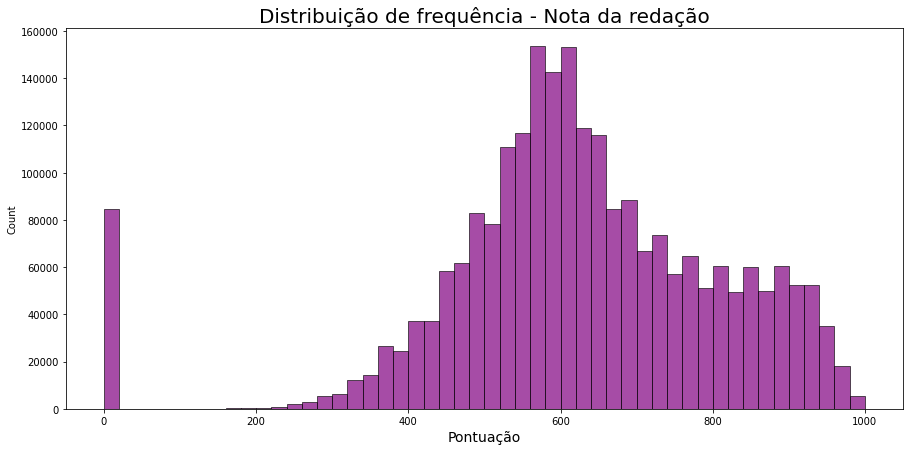

In [ ]:
from scipy.stats import alpha
ax = sns.histplot(df_enem['NU_NOTA_REDACAO'],
                  kde=False,
                  bins= 50,
                  color= 'purple',
                  alpha= 0.7)

ax.figure.set_size_inches(15,7)
ax.set_title('Distribuição de frequência - Nota da redação',
             fontsize=20)
ax.set_xlabel('Pontuação',
              fontsize=14)

ax

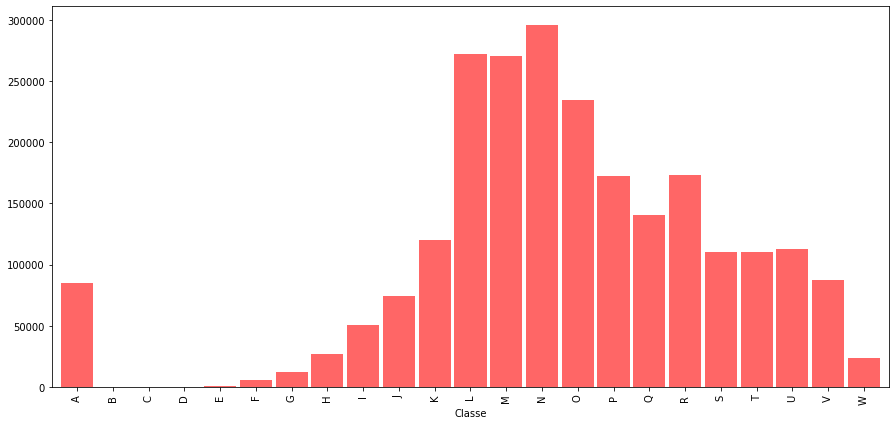

In [ ]:
dist_freq_ampl_fixa['Frequência'].plot.bar(width= 0.9,
                                           color= 'red',
                                           alpha= 0.6,
                                           figsize=(15, 7))

## <font color=gree>Medidas de tendência central


### Média aritimética
***

É representada por $\mu$ quado se refere à população e por $\bar{X}$ quando se refere à amostra.

# $$\mu = \frac 1n\sum{i='}^{n}X_i$$

onde

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

#### Média de cada nota do Data Frame
***

In [ ]:
notas_geral = pd.DataFrame(df_enem[[
                         'TP_SEXO',
                         'NU_NOTA_CN',
                         'NU_NOTA_CH',
                         'NU_NOTA_LC',
                         'NU_NOTA_MT',
                         'NU_NOTA_COMP1',
                         'NU_NOTA_COMP2',
                         'NU_NOTA_COMP3',
                         'NU_NOTA_COMP4',
                         'NU_NOTA_COMP5',
                         'NU_NOTA_REDACAO']])

notas_geral.head()

,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,F,NaN,574.6,472.6,NaN,140.0,120.0,120.0,180.0,200.0,760.0
1,M,505.9,551.8,498.3,461.5,120.0,120.0,120.0,120.0,80.0,560.0
2,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M,580.7,678.9,638.9,659.5,120.0,180.0,120.0,200.0,160.0,780.0
4,F,497.7,532.4,457.6,582.6,120.0,140.0,160.0,180.0,180.0,780.0


In [ ]:
notas_medias_geral = pd.DataFrame(notas_geral.groupby('TP_SEXO').mean().round(3))
notas_medias_geral.rename(index= sexo, inplace=True)

notas_medias_geral

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
TP_SEXO,,,,,,,,,,
Feminino,483.118,513.288,499.491,519.805,121.789,140.399,117.353,130.432,114.377,624.351
Masculino,505.758,530.721,507.517,559.704,115.179,134.185,112.006,124.547,110.013,595.929


#### Nota média das redações agrupadas por cor e sexo
***

In [ ]:
nota_media_redacao = pd.crosstab(df_enem['TP_SEXO'],
                                 df_enem['TP_COR_RACA'],
                                 aggfunc='mean',
                                 values= df_enem['NU_NOTA_REDACAO']).round(2)
nota_media_redacao.rename(index= sexo, columns= cor, inplace=True)

nota_media_redacao

TP_COR_RACA,Não declarado,Branca,Preta,Parda,Amarela,Indígena,Não dispõe da informação
TP_SEXO,,,,,,,
Feminino,606.51,662.48,587.06,597.03,613.79,523.19,500.0
Masculino,568.96,626.62,563.55,574.04,599.08,499.09,480.0


### Mediana
***

Para obtermos a mediana de um conjunto de dados devemos proceder da seguinte maneira:
1. ordenar o conjunto de dados;
2. identificar o número de observações (registros) do conjunto de dados $n$;
3. identificar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:

# $$Elemendo_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:

# $$Elemento_{Md} = \frac{n}2$$

4. obter a mediana:

> Quando $n$ for ímpar:

# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$

#### Mediana da nota da redação (dividida pelo sexo)
***

In [ ]:
mediana_redacao = pd.DataFrame(notas_geral.groupby('TP_SEXO')['NU_NOTA_REDACAO'].median())
mediana_redacao.rename(index= sexo, inplace=True)

mediana_redacao

,NU_NOTA_REDACAO
TP_SEXO,
Feminino,620.0
Masculino,600.0


In [ ]:
mediana_redacao = pd.DataFrame(notas_geral.groupby('TP_SEXO')['NU_NOTA_REDACAO'].quantile())
mediana_redacao.rename(index= sexo, inplace=True)

mediana_redacao

,NU_NOTA_REDACAO
TP_SEXO,
Feminino,620.0
Masculino,600.0


### Moda
***

Pode se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [ ]:
notas_geral.mode()

,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,F,428.6,0.0,0.0,427.8,120.0,120.0,120.0,120.0,120.0,560.0


#### Relação entre média, mediana e moda
***